# Naive Bayes Models

In this lab you will work with **naive Bayes models**. Naive Bayes models are a surprisingly useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of statistial independence of the features. In many cases, naive Bayes module are suprisingly effective despite violating the assumption of independence. 

In simple terms, naive Bayes models use emperical distributions of the features to compute probabilities of the labels. The naive Bayes models can use most any family of distributions for the features. It is important to select the correct distribution family for the data you are working with. Common cases are:
- **Gaussian;** for continious or numerical features.
- **Bernoulli;** for features with binary values. 
- **Multinomial;** for features with more than two categories. 

These is one pit fall, the model fails if a zero probability is encountered. This situation occurs when there is a 'hole' in the sample space where there are no samples. A simple smoothing proceedure can deal with this problem. The smoothing hyperparameter, usually called alpha, is one of the few required for naive Bayes models. 

Some properties of naive Bayes models are:
- Computational complexity is linear in number of parameter/features, making naive Bayes models highly scalable. There are out or core approaches suitable for massive datasets.
- Requires minimal data to produce models that generalizes well. If there are only a few cases per category to train a model a naive Bayes model can be a good choice. 
- Have a simple and inherent regularization.

Naive Bayes models are used in many situatons including:

- Document classification
- SPAM detection
- Image classification 



## Example: Iris dataset

As a first example you will use a naive Bayes model to classify the species of iris flowers. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [1]:
## Import packages
library(ggplot2)
library(gridExtra)
library(repr)
library(dplyr)
library(caret)
library(e1071)
library(MLmetrics)

options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions


Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall



To get a feel for these data, you will now load and plot them. Execute this code and examine the results.  

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


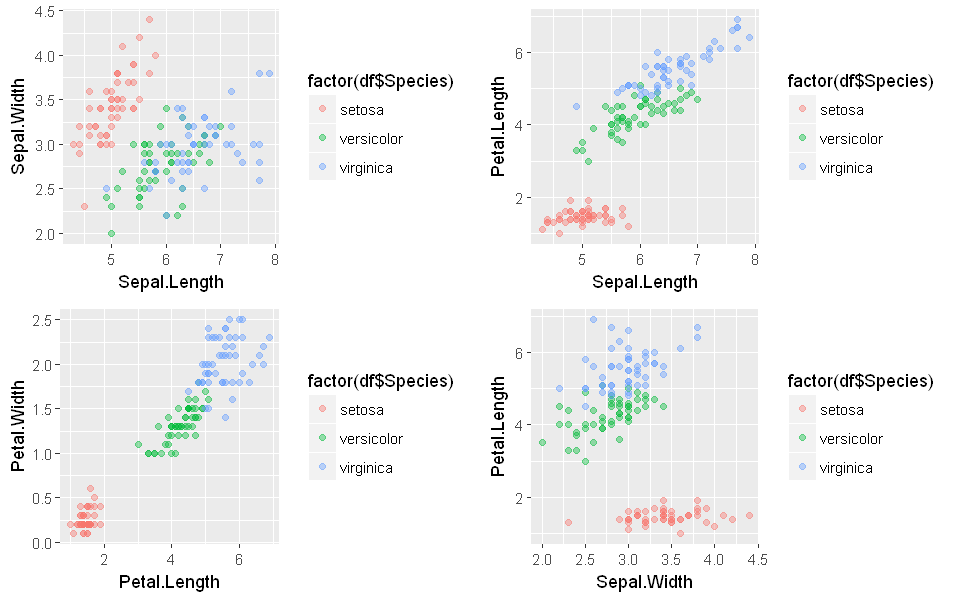

In [2]:
single_plot = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species)), alpha = 0.4)
}

plot_iris = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot(df, 'Sepal.Length', 'Petal.Length'),
        single_plot(df, 'Petal.Length', 'Petal.Width'),
        single_plot(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

head(iris, 10)   
plot_iris(iris)  

You can see that Setosa (in red) is well separated from the other two categories. The Versicolor (in green) and the Virginica (in blue) show considerable overlap. The question is how well our classifier will separate these categories. 

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 67% of the cases are being used as the test dataset. 

In [3]:
set.seed(1955)
## Randomly sample cases to create independent training and test data
partition = createDataPartition(iris[,'Species'], times = 1, p = 0.33, list = FALSE)
training = iris[partition,] # Create the training sample
dim(training)
test = iris[-partition,] # Create the test sample
dim(test)

[1] 51  5

[1] 99  5

As is always the case with machine learning, numeric features  must be scaled. Execute the code in the cell below to scale the training and test datasets:

In [4]:
num_cols = c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width')
preProcValues <- preProcess(training[,num_cols], method = c("center", "scale"))

training[,num_cols] = predict(preProcValues, training[,num_cols])
test[,num_cols] = predict(preProcValues, test[,num_cols])
head(training[,num_cols])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
3,-1.2646501,0.4563512,-1.348274,-1.287390
5,-0.9016267,1.4161001,-1.293220,-1.287390
6,-0.4175955,2.1359118,-1.128059,-1.027876
9,-1.6276734,-0.2634605,-1.293220,-1.287390
10,-1.0226345,0.2164140,-1.238167,-1.417146
11,-0.4175955,1.6560373,-1.238167,-1.287390


Now you will define and fit a naive Bayes model. The code in the cell uses the `naiveBayes` function from the e1071 package. The model formula is specified along with the data. Execute this code.

In [6]:
nb_mod = naiveBayes(factor(Species) ~ ., data = training)

Next, the code in the cell below uses the `predict` method is used to compute the multinomial class probabilities from the scaled features. Execute this code. 

In [7]:
test[,'scores'] = predict(nb_mod, newdata = test)
test[1:10,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,scores
1,-0.78061890,1.17616289,-1.293220,-1.287390,setosa,setosa
2,-1.02263448,-0.02352326,-1.293220,-1.287390,setosa,setosa
4,-1.38565786,0.21641397,-1.238167,-1.287390,setosa,setosa
7,-1.38565786,0.93622566,-1.293220,-1.157633,setosa,setosa
8,-0.90162669,0.93622566,-1.238167,-1.287390,setosa,setosa
12,-1.14364227,0.93622566,-1.183113,-1.287390,setosa,setosa
14,-1.74868124,-0.02352326,-1.458381,-1.417146,setosa,setosa
15,0.06643565,2.37584904,-1.403328,-1.287390,setosa,setosa
16,-0.05457214,3.33559795,-1.238167,-1.027876,setosa,setosa
19,-0.05457214,1.89597458,-1.128059,-1.157633,setosa,setosa


You can see actual species and predicted species. 

It is time to evaluate the model results. Keep in mind that the problem has been made deliberately difficult, by having more test cases than training cases. The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from previous labs to deal with a three category problem. Execute this code and examine the results.

In [8]:
print_metrics = function(df, label){
    ## Compute and print the confusion matrix
    cm = as.matrix(table(Actual = df$Species, Predicted = df$scores))
    print(cm)

    ## Compute and print accuracy 
    accuracy = round(sum(sapply(1:nrow(cm), function(i) cm[i,i]))/sum(cm), 3)
    cat('\n')
    cat(paste('Accuracy = ', as.character(accuracy)), '\n \n')                           

    ## Compute and print precision, recall and F1
    precision = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[i,]))
    recall = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[,i]))    
    F1 = sapply(1:nrow(cm), function(i) 2*(recall[i] * precision[i])/(recall[i] + precision[i]))    
    metrics = sapply(c(precision, recall, F1), round, 3)        
    metrics = t(matrix(metrics, nrow = nrow(cm), ncol = ncol(cm)))       
    dimnames(metrics) = list(c('Precision', 'Recall', 'F1'), unique(test$Species))      
    print(metrics)
}  
print_metrics(test, 'Species')      

            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         28         5
  virginica       0          3        30

Accuracy =  0.919 
 
          setosa versicolor virginica
Precision      1      0.848     0.909
Recall         1      0.903     0.857
F1             1      0.875     0.882


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overll accuracy is 0.92. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 51 cases. 
3. The precision, recall and  F1 for each of the classes is relatively good. Virginica has the worst metrics since it has the largest number of misclassified cases. 

How important are each of the features for this model? The R Caret package provides the capability to find out. As a first step, `gbm` models must be trained using the the Caret `train` function. The code in the cell below does this, using the default model arguments. The default arguments for the model are specified with the `tuneGrid` argument of `train`. Execute the code.

In [9]:
trControl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_mod_train = train(factor(Species) ~ ., 
                      data = training, 
                      method = "svmLinear", 
                      verbose = FALSE,
                      trControl = trControl,
                      scale = FALSE, 
                      type = 'C-svc')
svm_mod_train

Support Vector Machines with Linear Kernel 

51 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 45, 45, 45, 46, 45, 47, ... 
Resampling results:

  Accuracy   Kappa    
  0.9688889  0.9533088

Tuning parameter 'C' was held constant at a value of 1

With the Caret model object trained, the feature importance can be computed and displayed. Execute this code and examine the results. 

In [10]:
options(repr.plot.width=4, repr.plot.height=3)
imp = varImp(svm_mod_train, scale = FALSE)$importance
imp

,setosa,versicolor,virginica
Sepal.Length,1.0000000,0.9446367,1.0000000
Sepal.Width,0.8961938,0.8961938,0.7283737
Petal.Length,1.0000000,1.0000000,1.0000000
Petal.Width,1.0000000,1.0000000,1.0000000


Examine the table above. Notice that `Sepal.Width` has the least importance for classifying each of the species. 

Execute this code, and answer **Question 1** on the course page.

Next, you will train and evaluate a model using the three most important features by executing the code in the cell below:

In [11]:
svm_mod_3 = svm(factor(Species) ~ Sepal.Length + Petal.Length + Petal.Width, data = training, 
                 scale = FALSE, type = 'C-classification')
test[,'scores'] = predict(svm_mod, newdata = test)
print_metrics(test, 'Species')  

            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         28         5
  virginica       0          3        30

Accuracy =  0.919 
 
          setosa versicolor virginica
Precision      1      0.848     0.909
Recall         1      0.903     0.857
F1             1      0.875     0.882


These results are identical to those obtained with the model with all features. The simpler model is preferred since it is likely to generalize better. 

The code in the cell below plots the classes of the iris flower along with the classification errors shown by shape. Execute this code and examine the results.  

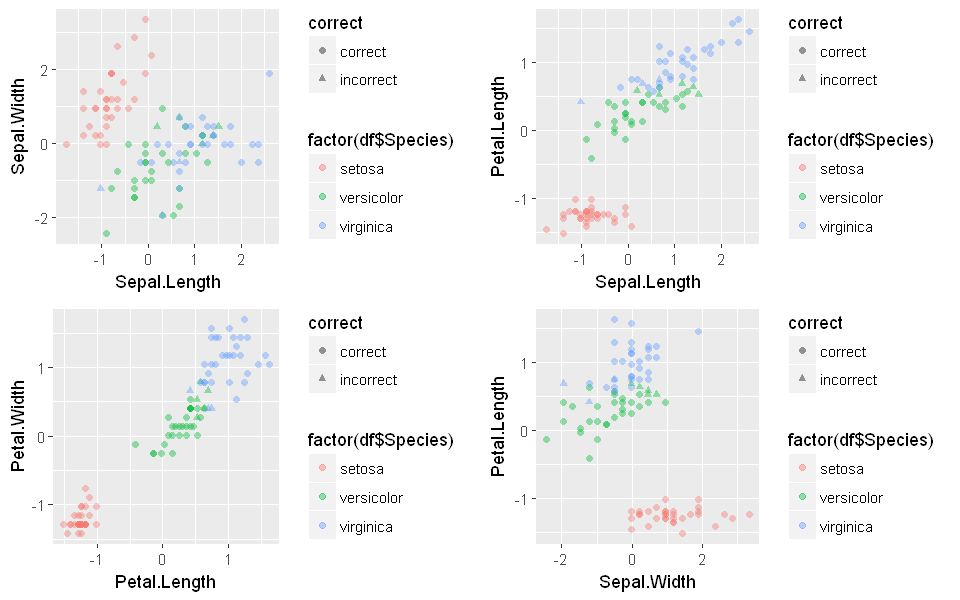

In [12]:
## Create column of correct-incorrect classification
test$correct = ifelse(test$Species == test$scores, 'correct', 'incorrect')

single_plot_classes = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species), shape = correct), alpha = 0.4)
}

plot_iris_classes = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot_classes(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot_classes(df, 'Sepal.Length', 'Petal.Length'),
        single_plot_classes(df, 'Petal.Length', 'Petal.Width'),
        single_plot_classes(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

plot_iris_classes(test)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected.  

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which had the the following preprocessing:
1. Cleaning missing values.
2. Aggregating categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardizing numeric variables. 

Execute the code in the cell below to load the features and labels as numpy arrays for the example. 

In [31]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(999, 35)
(999,)


The Features array has both numeric features and binary features (dummy variables for the categorical features). Therefore, a Gaussian model must be used. However, this model is not ideal, since numeric features are mixed with features exhibiting Bernoulli distributions, the binary features. 

The code in the cell below does the following processing:
1. Defines a 10 fold cross validatiion object. 
2. Defines a Gaussian naive Bayes model.
3. Performs a 10 fold cross validation.
4. Prints results from the cross validation. 

Execute this code and examine the result. 

In [32]:
nr.seed(321)
cv_folds = ms.KFold(n_splits=10, shuffle = True)
nr.seed(498)
NB_credit = GaussianNB()
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = cv_folds) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('fold ' + str(i+1) + '   %4.3f' % x)

Mean performance metric = 0.669
SDT of the metric       = 0.126
Outcomes by cv fold
fold 1   0.740
fold 2   0.700
fold 3   0.720
fold 4   0.710
fold 5   0.730
fold 6   0.730
fold 7   0.640
fold 8   0.730
fold 9   0.300
fold 10   0.687


Examine these results. Notice that the standard deviation of the mean of the AUC is more than an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

Now, you will build and test a model using a single split of the dataset. As a first step, execute the code in the cell below to create training and testing dataset.

In [33]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

The code in the cell below defines a naive Bayes model object and then fits the model to the training data. Execute this code:

In [34]:
NB_credit_mod = GaussianNB() 
NB_credit_mod.fit(x_train, y_train)

GaussianNB(priors=None)

using the test data subset, the code in the cell below scores and prints evaluation metrics for the model. Execute this code and examine the results. 

In [35]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('True positive    %6d' % conf[0,0] + '          %5d' % conf[0,1])
    print('True negative    %6d' % conf[1,0] + '          %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, scores))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('             Positive   Negative')
    print('Num case    %0.2f' % metrics[3][0] + '       %0.2f' % metrics[3][1])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1])

scores = NB_credit_mod.predict(x_test)
print_metrics(y_test, scores)     

                 Confusion matrix
                 Score positive    Score negative
True positive       178             39
True negative        40             43

Accuracy        0.74
AUC             0.67
Macro precision 0.67
Macro recall    0.67
 
             Positive   Negative
Num case    217.00       83.00
Precision   0.82          0.52
Recall      0.82          0.52
F1          0.82          0.52


Overall, these performance metrics are poor. Barely half the bad credit risk customers are correctly identified. The reported AUC is quite a bit better than the mean achieved with the 5 fold cross validation. It is likely these figures are optimistic. 

Perhaps, a Bernoulli naive Bayes model will work better. Since naive Bayes models tend to be less sensitive to the quantity of training data, this approach may be reasonable. To apply this model, the numeric features must be dropped from the array. Execute the code in the cell below to remove the numeric features and examine the resulting sample. 

In [36]:
Features = Features[:,4:]
Features[:3,:]

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]])

You can see that all of the features are binary. A Bernoulli naive Bayes can now be applied to these features. 

10 fold nested cross validation is used to estimate the optimal hyperparameter and performs model selection for the naive Bayes model. Execute the code in the cell below to define inside and outside fold objects.

In [37]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

The code in the cell below estimates the best hyperparamters using 10 fold cross validaton. There are two points to notice here:
1. In this case, a grid for one hyperparameter: alpha is the smoothing parameter to avoid zero probabilities.  
3. The model is fit on the grid and the best estimated hyperparameters are prinited. 

Execute this code and examine the result. 

In [38]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model
NB_clf = BernoulliNB() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = NB_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = sklm.make_scorer(sklm.roc_auc_score),
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.alpha)

0.0001


The smallest alpha hyperparameter has been selected. This indicates that there is very litte problem with zero probabilities in this problem. This situation results from the fact that the probability space sampled is dense. 

The code in the cell below executes the outter loop of the cross validation to estimate model performance with the optimal hyperparameter. Exectute this code and examine the result.

In [39]:
NB_credit = BernoulliNB(alpha = 0.0001)
nr.seed(498)
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('fold ' + str(i+1) + '   %4.3f' % x)

Mean performance metric = 0.726
SDT of the metric       = 0.051
Outcomes by cv fold
fold 1   0.810
fold 2   0.730
fold 3   0.700
fold 4   0.790
fold 5   0.760
fold 6   0.710
fold 7   0.650
fold 8   0.720
fold 9   0.740
fold 10   0.646


At first look, the AUC seems reasonable. The standard deviation is an order of magnitude less than the AUC. 

Next, sample the dataset into training and testing subsets by executing the code in the cell below.

In [40]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

Now, execute the code below to fit and score the Bernoulli naive Bayes model and display the pereformance metrics. 

In [41]:
NB_credit_mod = BernoulliNB(alpha = 0.0001) 
NB_credit_mod.fit(x_train, y_train)
scores = NB_credit_mod.predict(x_test)
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
True positive       180             37
True negative        35             48

Accuracy        0.76
AUC             0.70
Macro precision 0.70
Macro recall    0.70
 
             Positive   Negative
Num case    217.00       83.00
Precision   0.84          0.56
Recall      0.83          0.58
F1          0.83          0.57


The results for this Bernoulli naive Bayes model are much better than for the Gaussian model. Still, they could be better.

The current model uses the emperical distribution of the label values for the prior value of $p$ of the Bernoulli distributin. This probability is invariably skewed toward the majority case. Since the bank cares more about the minority case, setting this distribution to a fixed prior value can help overcome the class imbalance. The code in the cell below redefines the model object with prior probability of 0.6 for the minority case. Execute this code and examine the results.

In [42]:
NB_credit_mod = BernoulliNB(alpha = 0.0001, class_prior = [0.4,0.6]) 
NB_credit_mod.fit(x_train, y_train)
scores = NB_credit_mod.predict(x_test)
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
True positive       122             95
True negative        17             66

Accuracy        0.63
AUC             0.68
Macro precision 0.64
Macro recall    0.68
 
             Positive   Negative
Num case    217.00       83.00
Precision   0.88          0.41
Recall      0.56          0.80
F1          0.69          0.54


The majority of bad credit cases are now correctly identified. However, this charactersitic is at the cost of a high false negative error rate. Still, given that the cost to the bank of a false negative is five times the cost of a false positive, this may be a good solution. An infinite number of other models are possible by changing the prior distribution. 

## Summary

In this lab you have accomplished the following:
1. Used a Gaussian naive model to classify the cases of the iris data. The overall model performance was reasonable. 
2. Fit a Gaussian naive Bayes model on the bank credit data. The performance of this model was poor as a resut of many Bernoulli distributed dummy features.
3. Used a Bernoulli naive Bayes model for the bank credit data by eliminating the numeric features. Overall, this model was much better. 
4. A model skewed toward detecting bad credit cases was created using a prior distribution rather than the emperical distribution of the labels. This model correctly classified a significant number of the bad credit cases. Selecting other prior distributions will give other models. 